In [3]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
print(pd.__version__)

1.4.1


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [7]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [6]:
carpeta="data/Only_training_hipotesis_salida/"

In [8]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/Only_training_hipotesis_salida/pTEST_new_0.2_9.csv.pickle'

In [6]:
dasdas =pd.read_pickle(a[0])
dasdas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.2110...","[0.006305703, 0.06551562, 0.92817867]","[0.0, 0.0, 1.0]",0,5974,contradiction,contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,ADJ}, there{there,ADV}, is{be,VERB}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.016168319, 0.0140...","[0.99017394, 0.009517933, 0.00030803506]","[1.0, 0.0, 0.0]",0,9031,entailment,entailment
2,2,"[NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...","[NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17911102, 0.09273...","[0.008069085, 0.9096557, 0.08227522]","[0.0, 1.0, 0.0]",0,6904,neutral,neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, individual{indivi...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.10867564, 0.0724...","[0.96718806, 0.028018078, 0.0047938903]","[1.0, 0.0, 0.0]",0,7300,entailment,entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, the{the,DET}, kids{kid,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17104001, 0.0249...","[0.066414595, 0.878744, 0.05484137]","[0.0, 0.0, 1.0]",0,7779,neutral,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
675,675,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, he{-PRON-,PRON}, has{have,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.023192137, 0.4689...","[0.013301309, 0.011364532, 0.9753341]","[0.0, 0.0, 1.0]",1,9610,contradiction,contradiction
676,676,"[NULL{null,ADJ}, girl{girl,NOUN}, wearing{wear...","[NULL{null,ADJ}, one{one,NUM}, plays{play,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.23011616, 0.1234...","[0.030716334, 0.96501446, 0.0042692097]","[0.0, 1.0, 0.0]",1,9708,neutral,neutral
677,677,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, ma{ma,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.11288659, 0.0161...","[0.4431446, 0.47437942, 0.08247595]","[0.0, 1.0, 0.0]",1,9726,neutral,neutral
678,678,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, one{one,NUM}, reward{reward,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.08744241, 0.0140...","[0.004797376, 0.39436302, 0.6008396]","[0.0, 1.0, 0.0]",1,9764,contradiction,neutral


In [10]:
stats.zscore([[1,2,3,4],[4,3,2,1]])

array([[-1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.]])

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [16]:
etiquetas=['entailment','neutral','contradiction']

In [11]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [15]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_entropia=[]
                for index,strings in temp.iterrows():
                    t=strings[1]
                    h=strings[2]
                    matriz=strings[5]
                    matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                    l_entropia.append(entropia_f(stats.zscore(matriz_c.T).flatten()))
                new_data['entropia'].append(np.array(l_entropia[:]))
                new_data['Paraphrase'].append(i)
                l_entropia.clear()
dfn=pd.DataFrame(new_data)

KeyboardInterrupt: 

In [13]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [9]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [10]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,91,entailment_entailment,"[5.781, 6.533, 6.585, 7.789, 6.226, 5.129, 6.5...",0
1,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,7,entailment_neutral,"[6.962, 6.596, 6.607, 5.596, 4.644, 6.472, 6.819]",0
2,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,3,entailment_contradiction,"[6.465, 7.334, 6.982]",0
3,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,135,17,neutral_entailment,"[5.657, 5.977, 5.586, 6.609, 5.295, 6.187, 6.5...",0
4,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,135,103,neutral_neutral,"[7.186, 7.002, 6.28, 6.226, 6.913, 5.557, 5.52...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[5.468, 6.797, 5.773, 5.807, 6.766, 7.233, 5.5...",1
2174,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[6.533, 6.862, 6.975, 5.107, 6.701, 5.948, 6.7...",1
2175,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[5.74, 6.059, 5.492, 6.824, 6.808, 4.644, 6.24...",1
2176,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[5.576, 6.129, 5.755, 5.491, 3.17, 7.339, 6.64...",1


In [11]:
len(dfn['grupo'].unique())

7

In [12]:
dfn['entropia'][0]

array([5.781, 6.533, 6.585, 7.789, 6.226, 5.129, 6.581, 6.691, 5.996,
       7.187, 5.837, 4.585, 6.397, 5.17 , 4.322, 6.142, 7.028, 6.828,
       4.755, 5.359, 6.065, 5.977, 6.821, 5.707, 5.774, 5.27 , 6.022,
       2.506, 6.19 , 5.74 , 5.755, 5.512, 5.907, 7.072, 6.039, 5.272,
       6.692, 4.907, 5.122, 5.781, 5.781, 7.374, 6.322, 6.349, 5.75 ,
       6.373, 8.695, 6.407, 5.892, 6.186, 5.761, 6.644, 4.596, 7.993,
       6.449, 7.229, 5.977, 5.622, 6.616, 6.348, 5.755, 5.844, 1.661,
       5.   , 6.505, 7.919, 6.503, 6.907, 4.644, 5.445, 6.527, 5.92 ,
       5.278, 3.398, 6.138, 6.819, 6.471, 6.095, 5.17 , 5.984, 5.17 ,
       5.335, 5.044, 6.581, 5.189, 4.964, 5.   , 6.037, 7.118, 4.507,
       7.22 ])

In [17]:
etiquetas

['entailment', 'neutral', 'contradiction']

In [18]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [19]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el) & (dfn['Paraphrase']==0)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([5.781, 6.533, 6.585, 7.789, 6.226, 5.129, 6.581, 6.691, 5.996,
        7.187, 5.837, 4.585, 6.397, 5.17 , 4.322, 6.142, 7.028, 6.828,
        4.755, 5.359, 6.065, 5.977, 6.821, 5.707, 5.774, 5.27 , 6.022,
        2.506, 6.19 , 5.74 , 5.755, 5.512, 5.907, 7.072, 6.039, 5.272,
        6.692, 4.907, 5.122, 5.781, 5.781, 7.374, 6.322, 6.349, 5.75 ,
        6.373, 8.695, 6.407, 5.892, 6.186, 5.761, 6.644, 4.596, 7.993,
        6.449, 7.229, 5.977, 5.622, 6.616, 6.348, 5.755, 5.844, 1.661,
        5.   , 6.505, 7.919, 6.503, 6.907, 4.644, 5.445, 6.527, 5.92 ,
        5.278, 3.398, 6.138, 6.819, 6.471, 6.095, 5.17 , 5.984, 5.17 ,
        5.335, 5.044, 6.581, 5.189, 4.964, 5.   , 6.037, 7.118, 4.507,
        7.22 ]),
 array([6.962, 6.596, 6.607, 5.596, 4.644, 6.472, 6.819]),
 array([6.465, 7.334, 6.982]),
 array([5.657, 5.977, 5.586, 6.609, 5.295, 6.187, 6.565, 5.807, 6.35 ,
        6.79 , 5.624, 6.714, 5.692, 5.622, 6.474, 5.962, 5.808]),
 array([7.186, 7.002, 6.28 , 6.226, 6.913, 5.5

In [20]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x7f9987829ca0>,
 [Text(0, 0, 'entailment_entailment'),
  Text(1, 0, 'entailment_neutral'),
  Text(2, 0, 'entailment_contradiction'),
  Text(3, 0, 'neutral_entailment'),
  Text(4, 0, 'neutral_neutral'),
  Text(5, 0, 'neutral_contradiction'),
  Text(6, 0, 'contradiction_entailment'),
  Text(7, 0, 'contradiction_neutral'),
  Text(8, 0, 'contradiction_contradiction')])

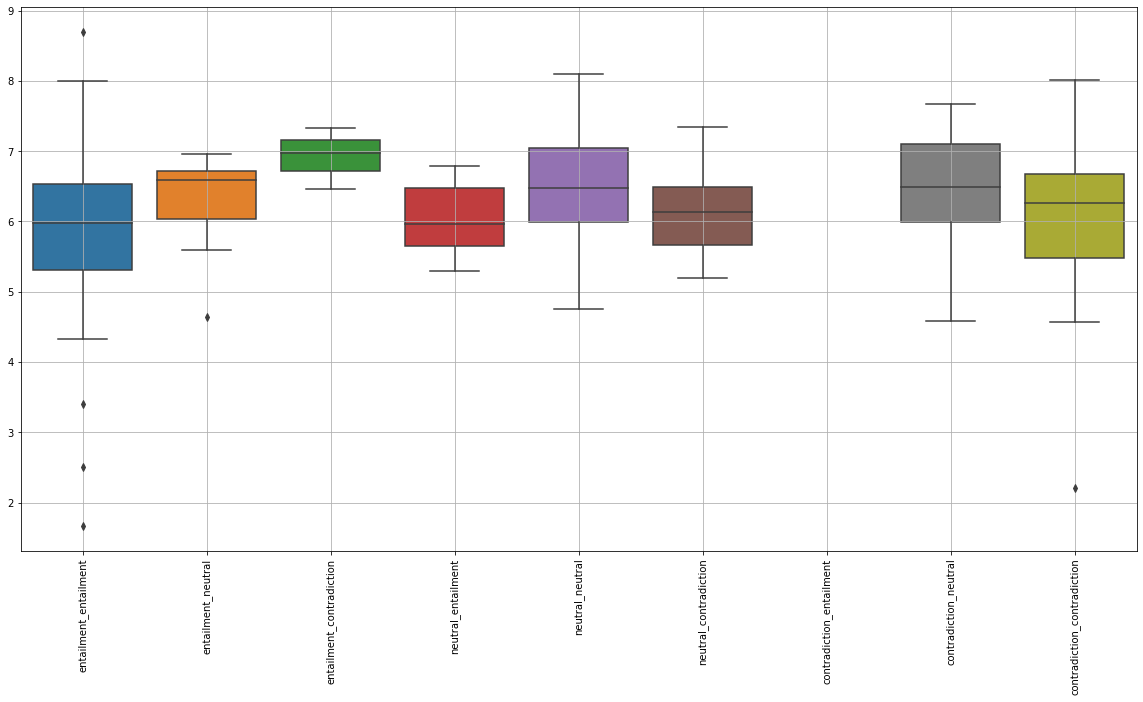

In [21]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [22]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            l_mean_entropia.append(np.nanmean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

/tmp/ipykernel_28638/654303805.py:10: RuntimeWarning: Mean of empty slice
  l_mean_entropia.append(np.nanmean(strings['entropia']))


In [23]:
l_grupos_p=dfn.grupo.unique()
labels_g_p=[]
datos_g_p=[]
grupo_g_p=[]
for lg in l_grupos_p:
    for lab in labels:
        l_mean_entropia_p=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==1)]
        for index,strings in temp.iterrows():
            l_mean_entropia_p.append(np.nanmean(strings['entropia']))
        labels_g_p.append(lab)
        datos_g_p.append(l_mean_entropia_p[:])
        l_mean_entropia_p.clear()
        grupo_g_p.append(lg)

In [24]:
len(grupo_g)

63

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

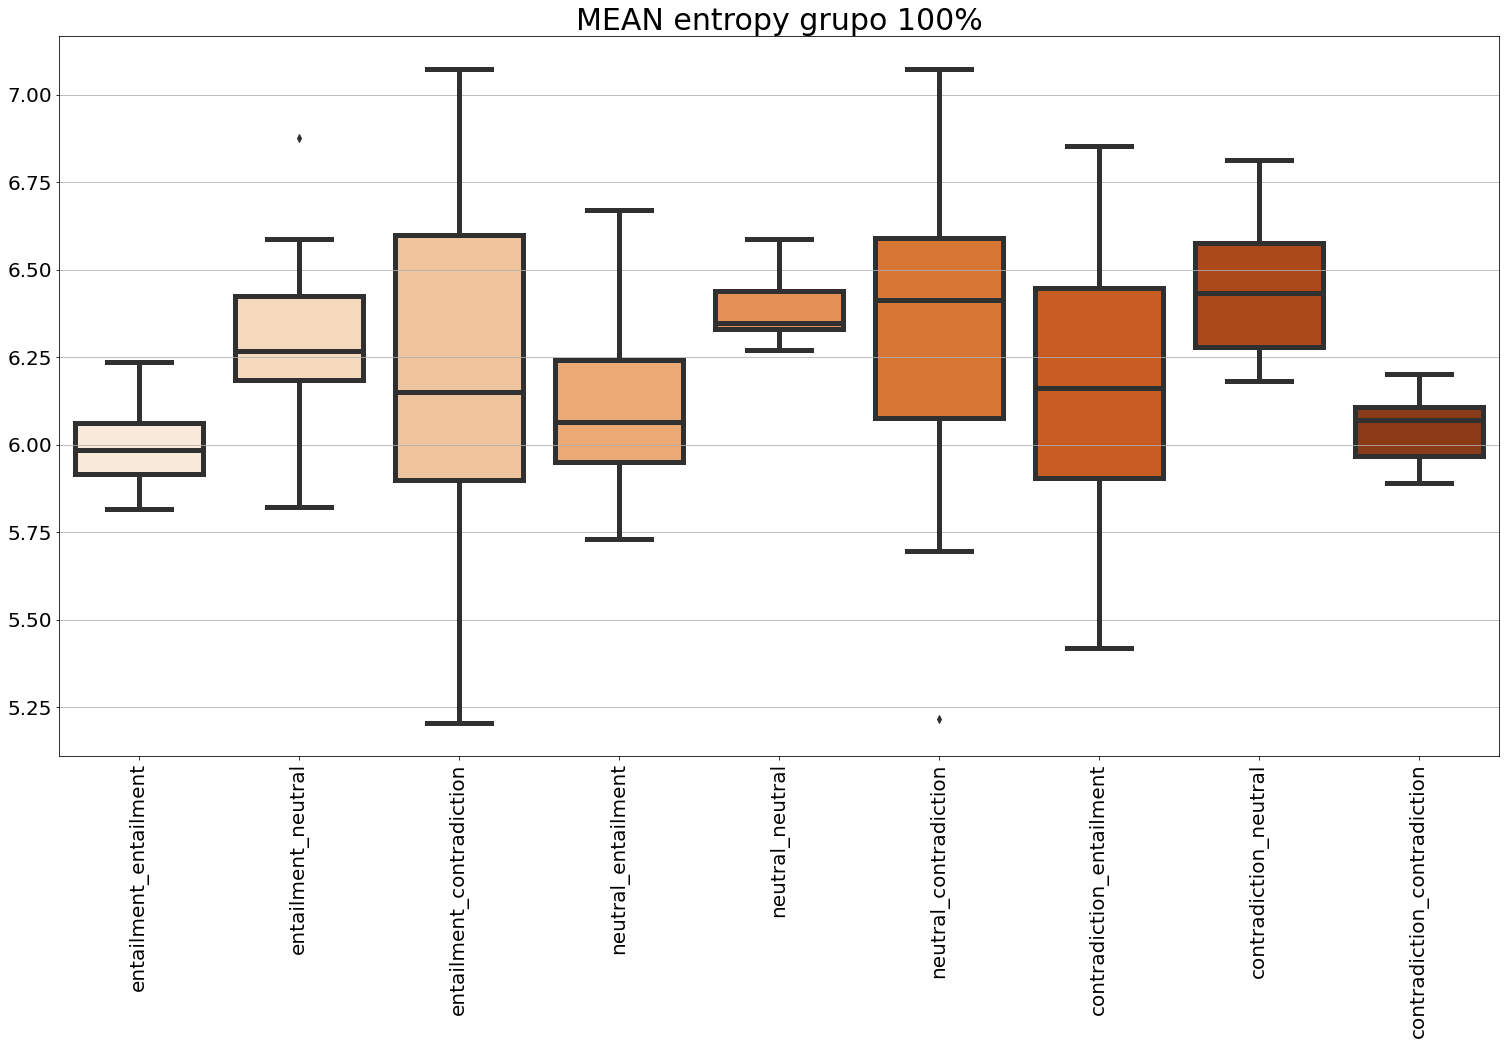

In [25]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[:9],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[:9],fontsize=20,rotation=90)


[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

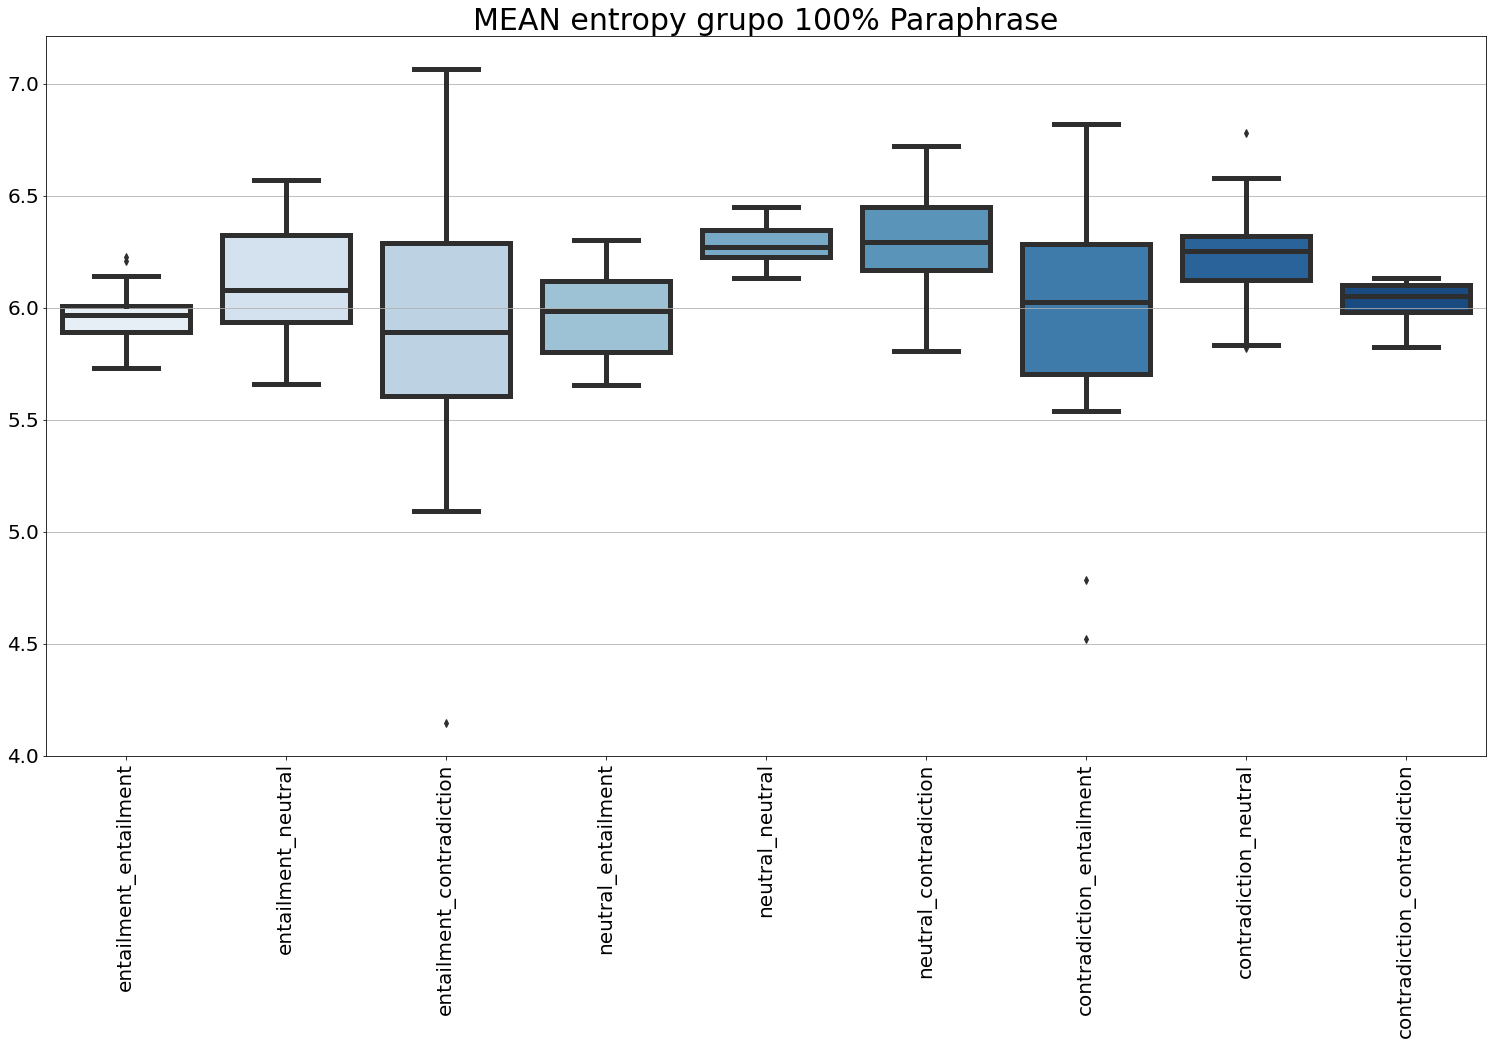

In [26]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[:9],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[:9],fontsize=20,rotation=90)


[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

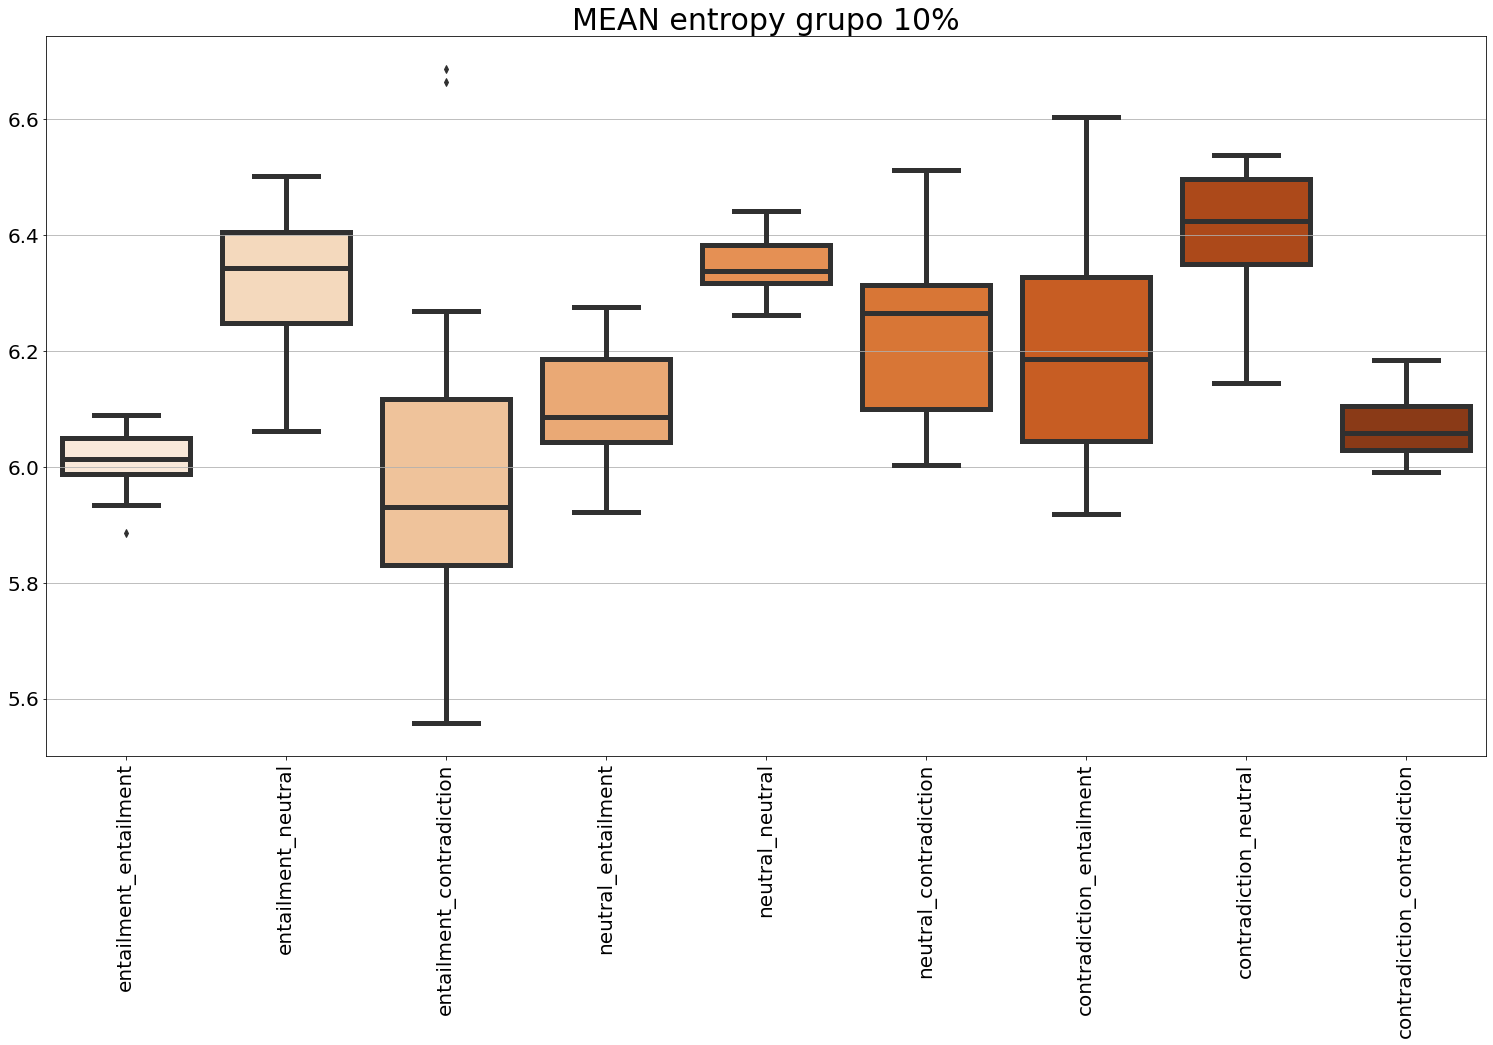

In [27]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[9:18],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[9:18],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

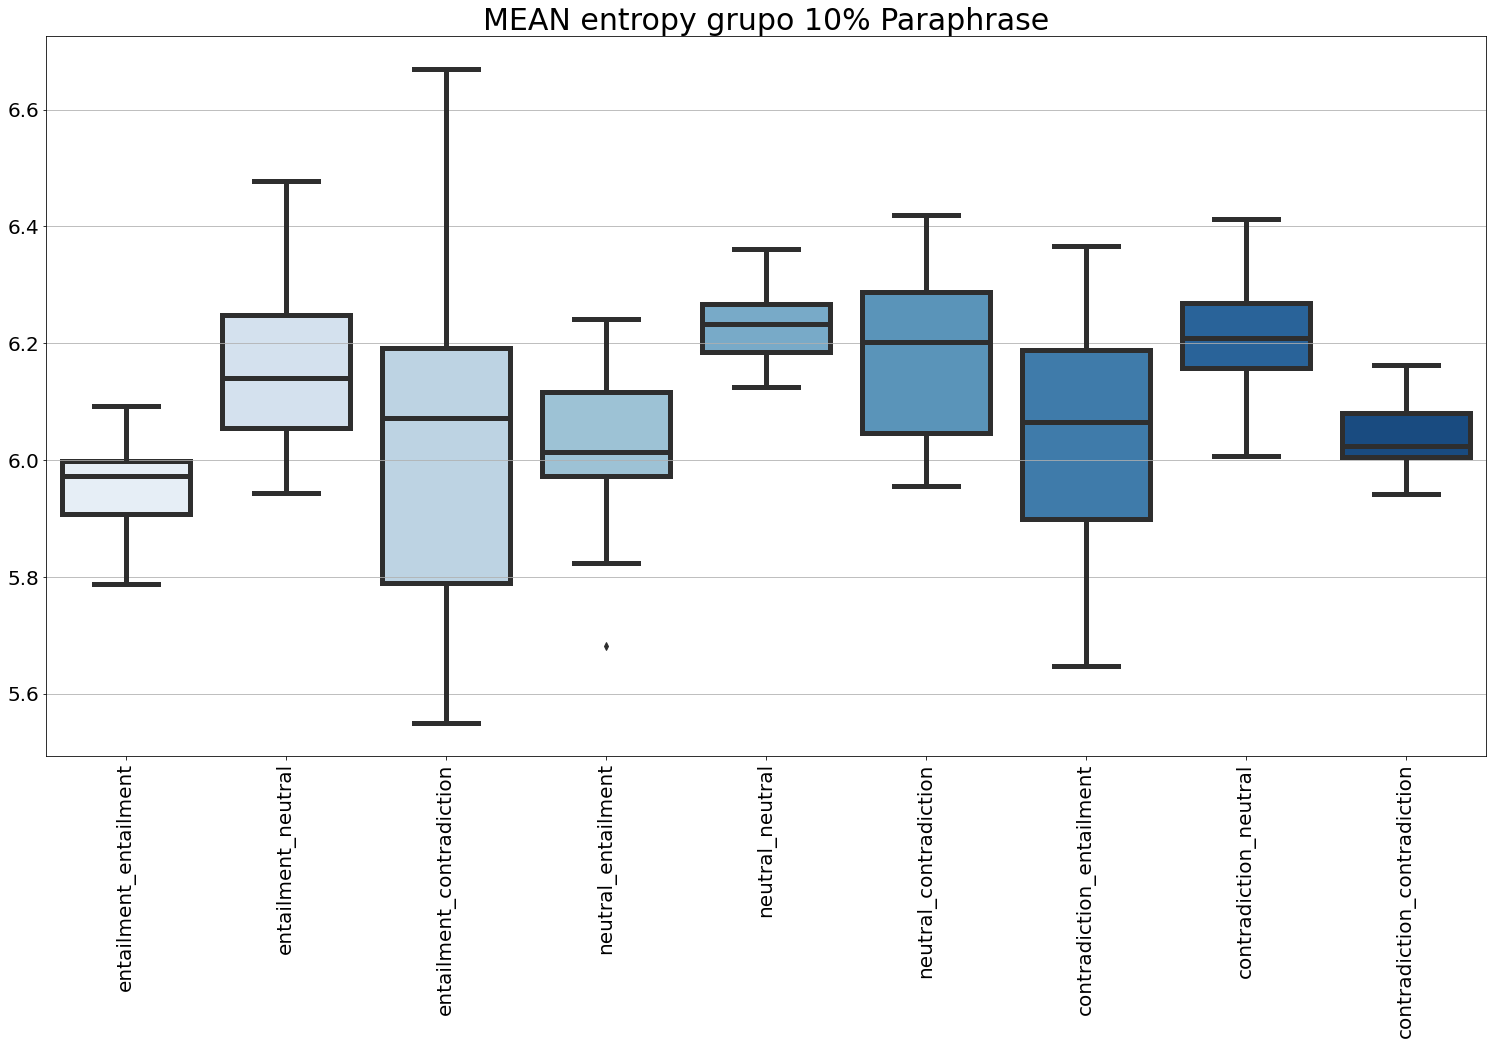

In [29]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[9:18],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[9:18],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

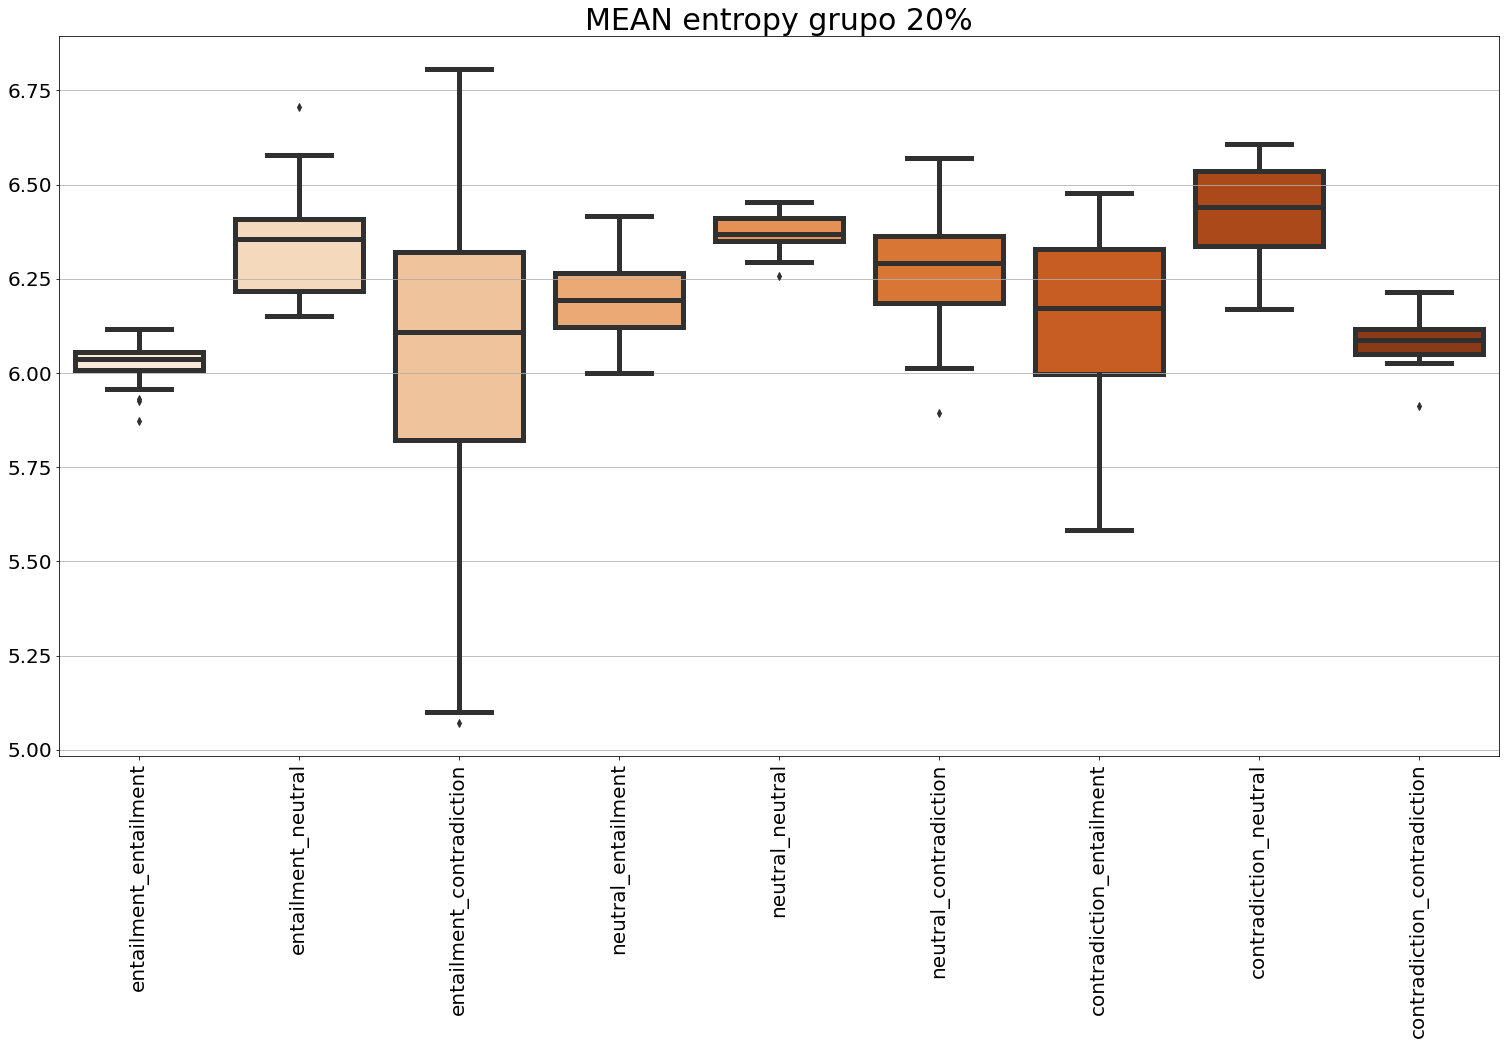

In [30]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[18:27],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[18:27],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

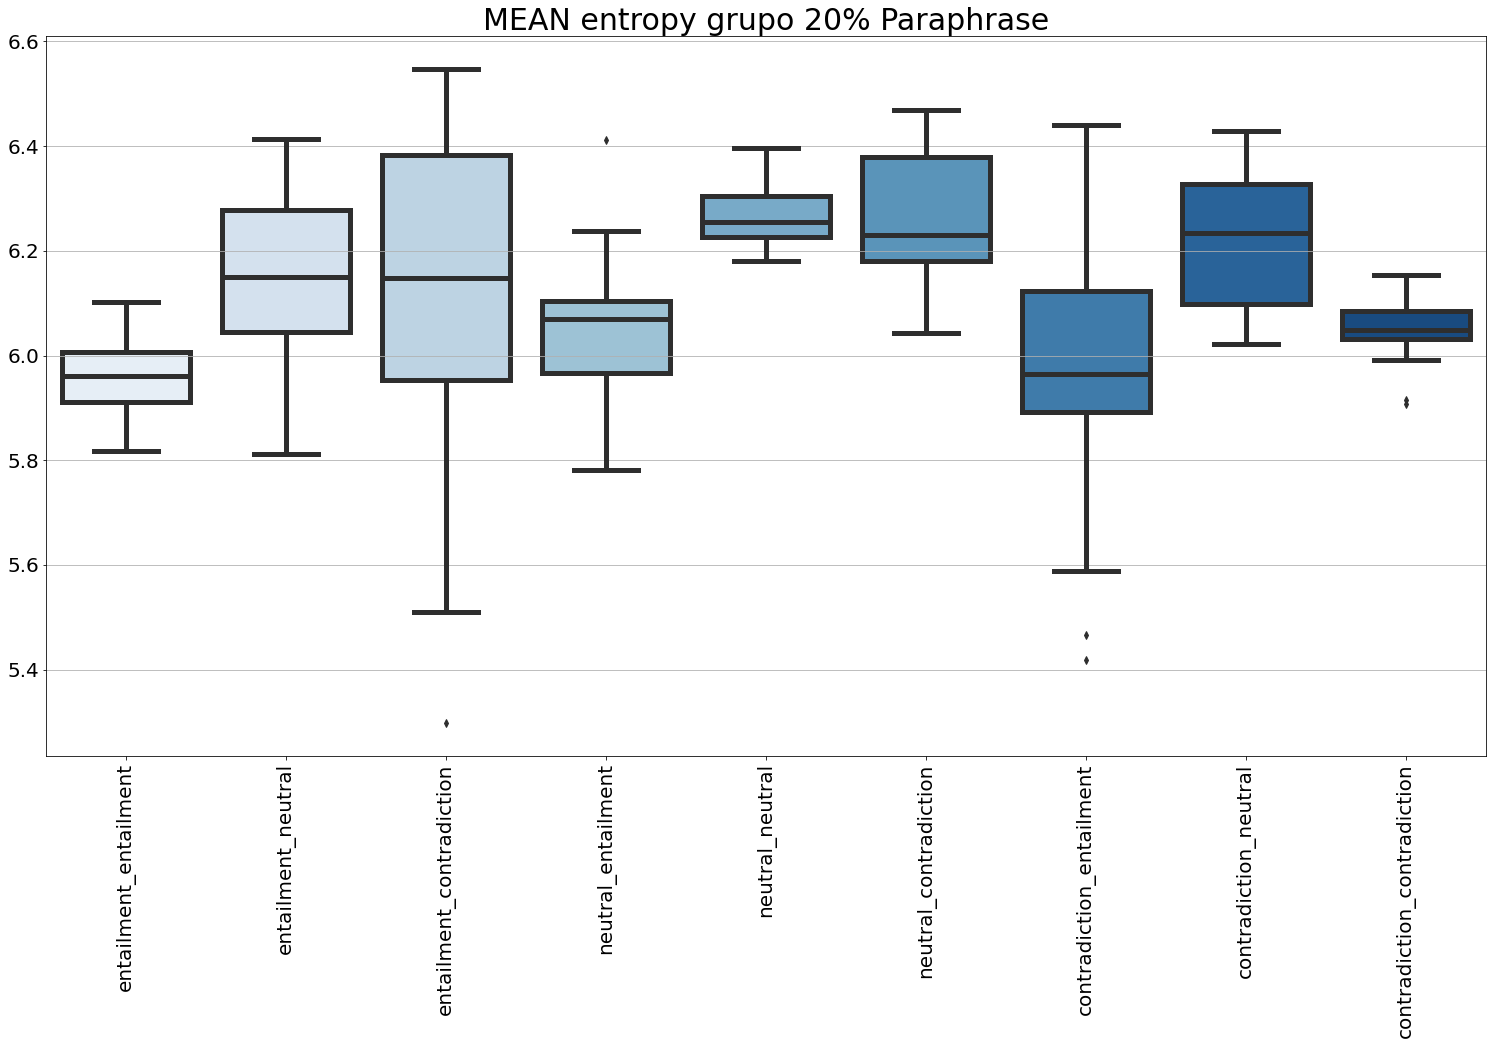

In [32]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[18:27],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[18:27],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

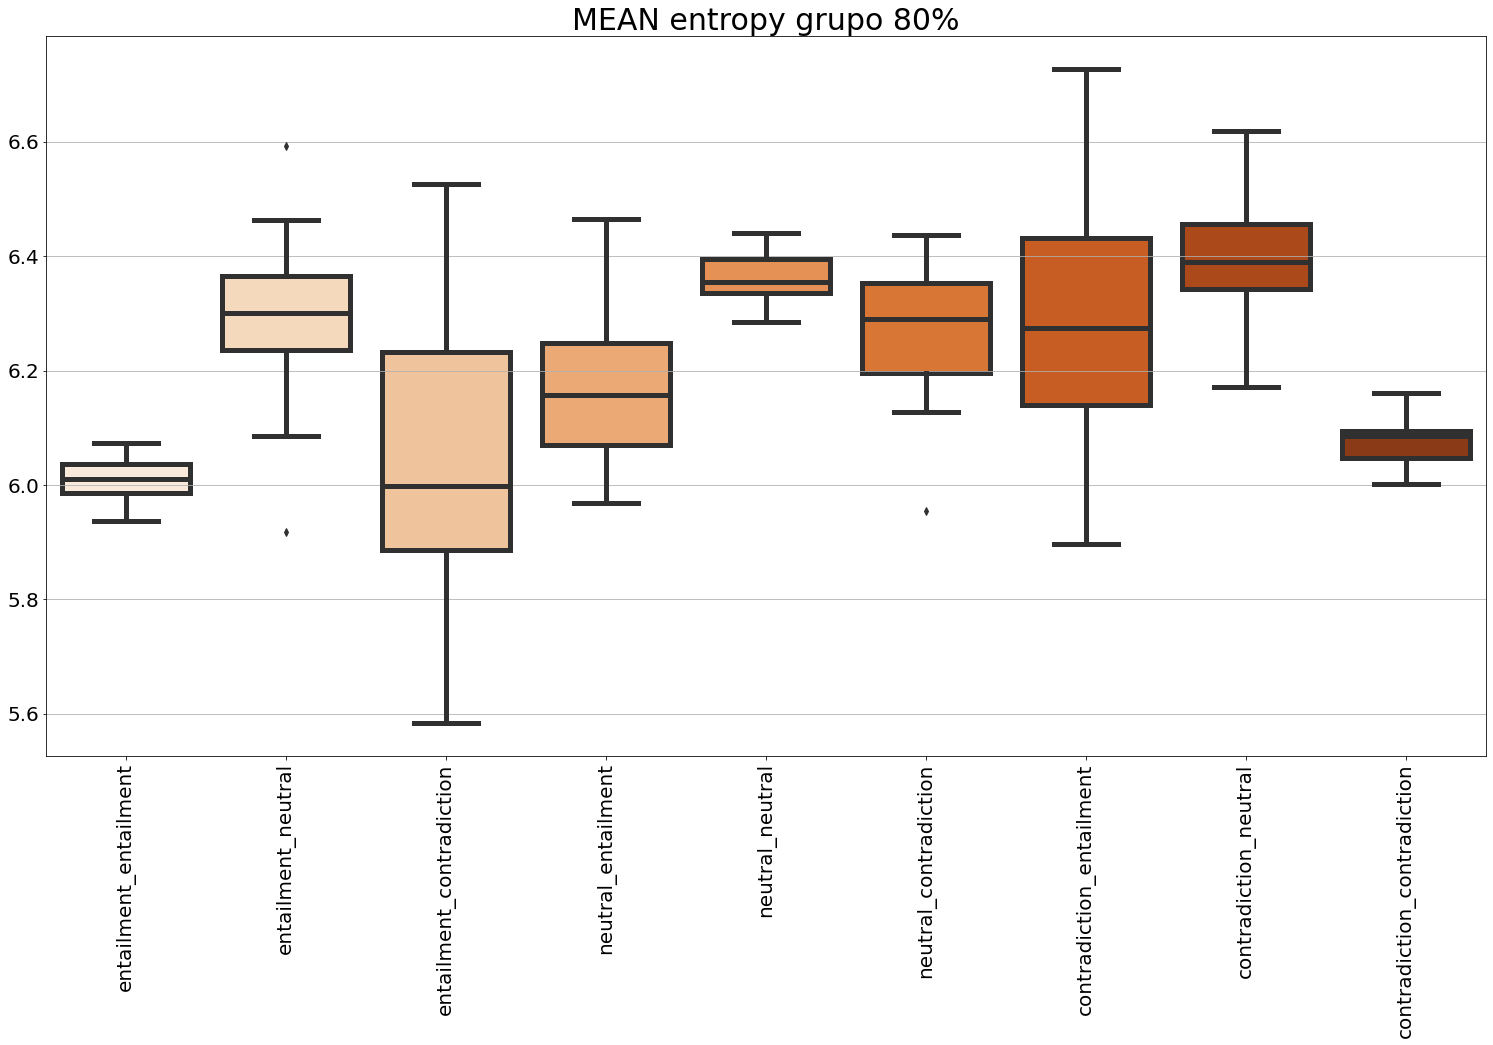

In [33]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[27:36],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[27:36],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

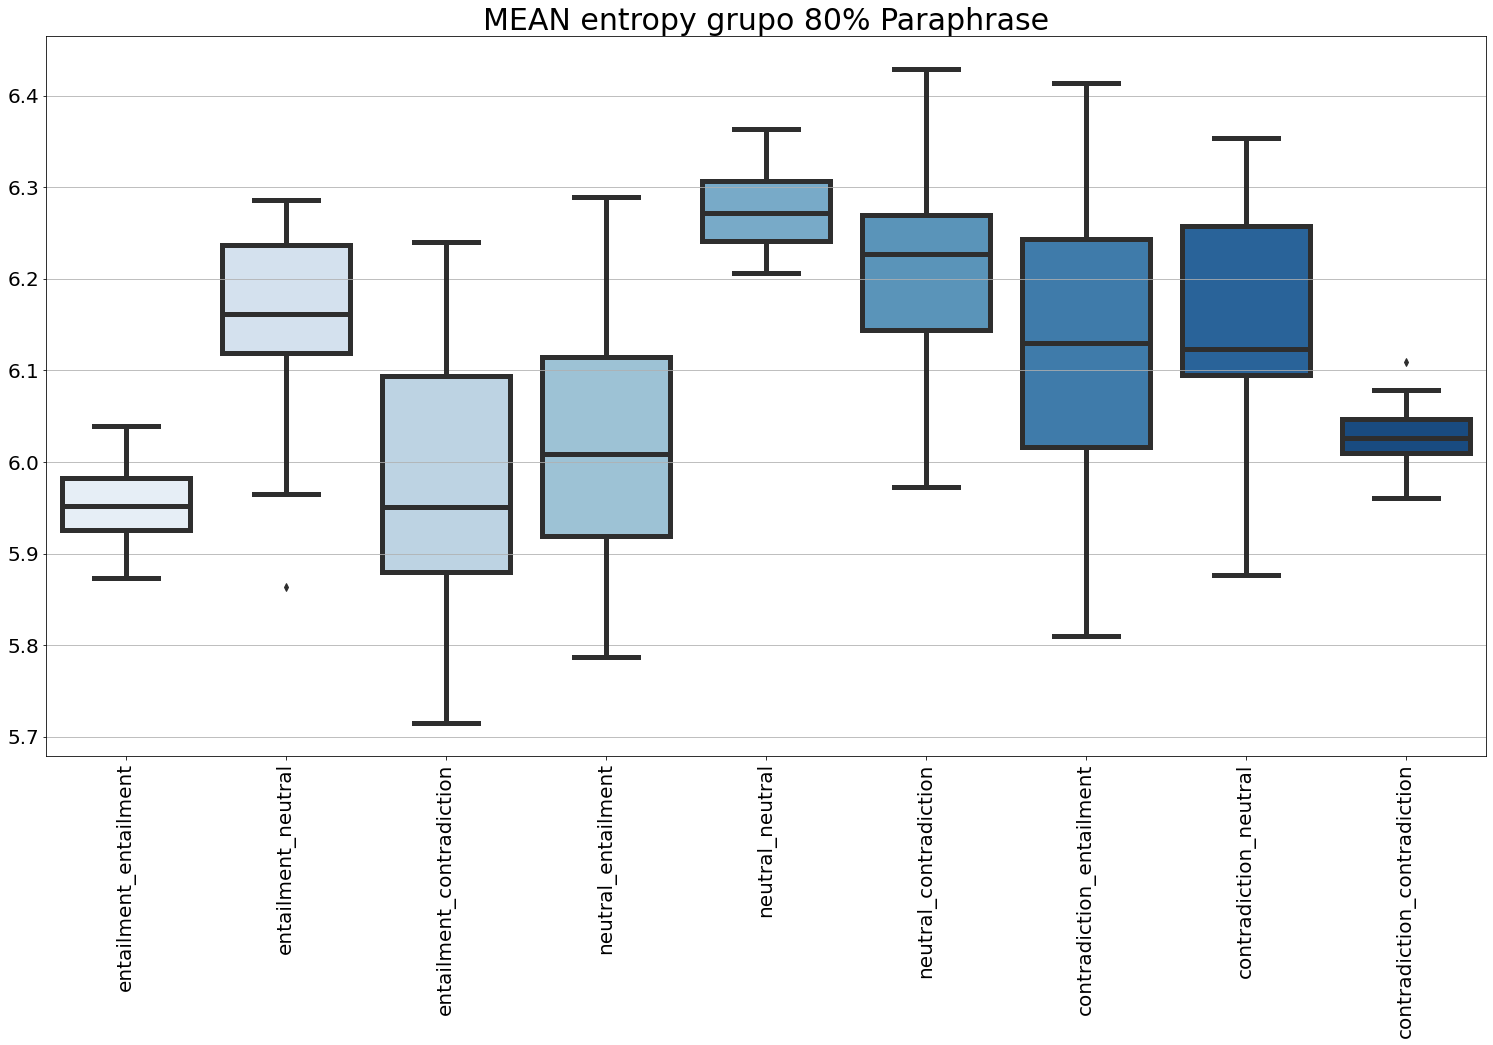

In [35]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[27:36],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[27:36],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

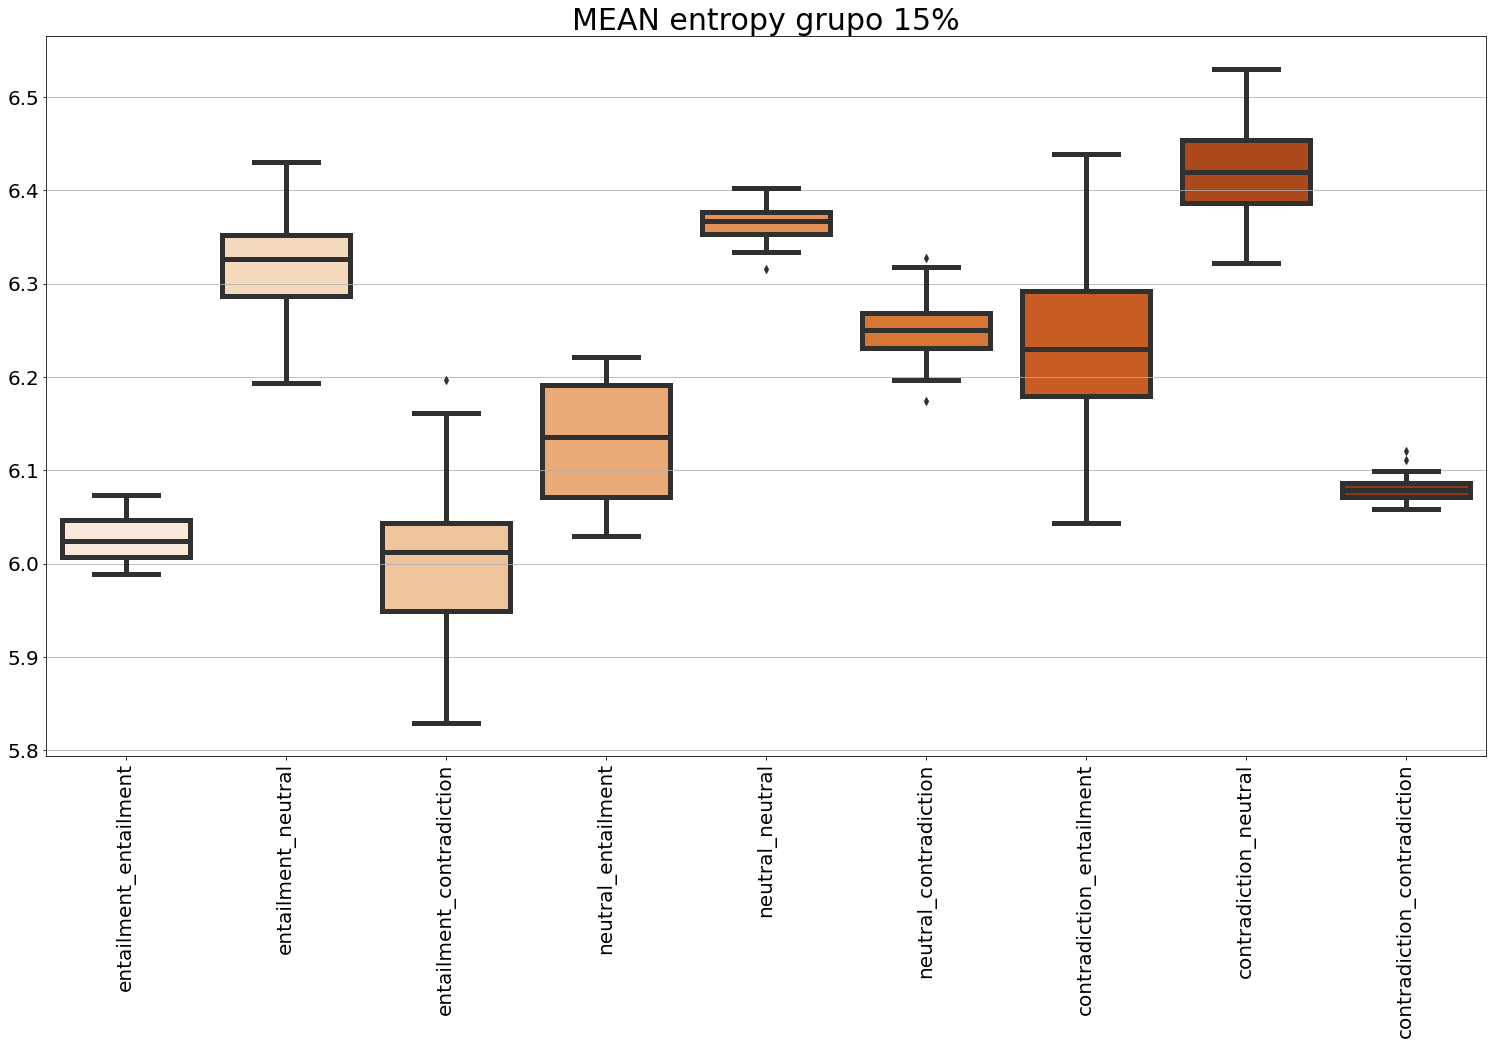

In [36]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[36:45],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[36:45],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

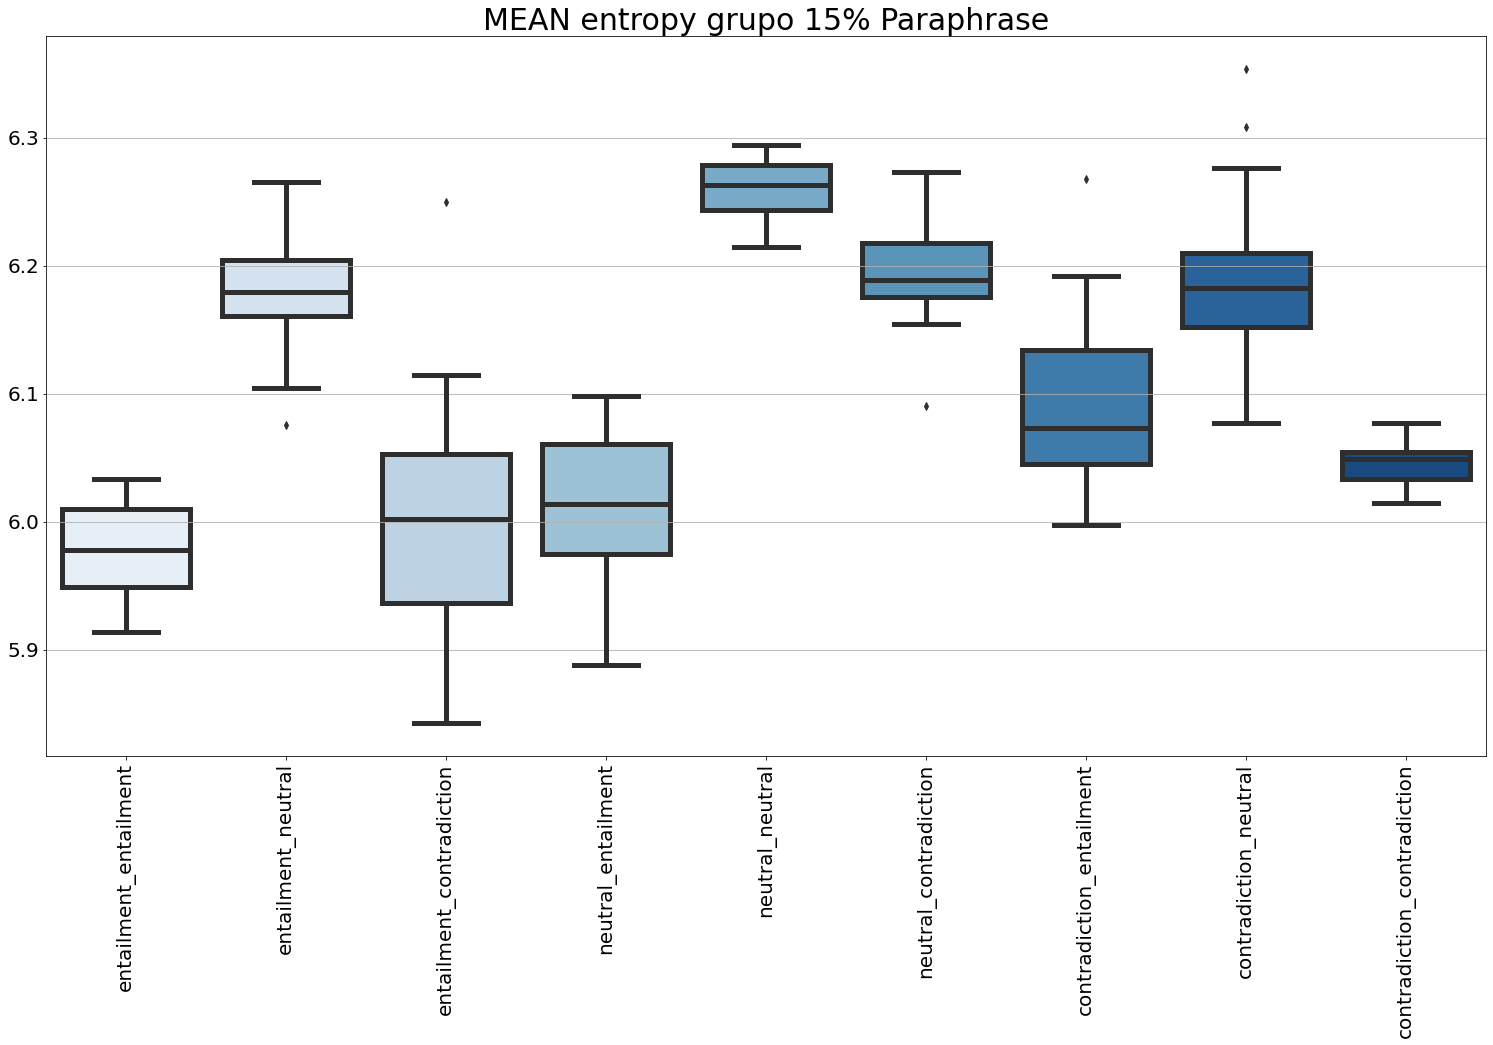

In [38]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[36:45],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[36:45],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

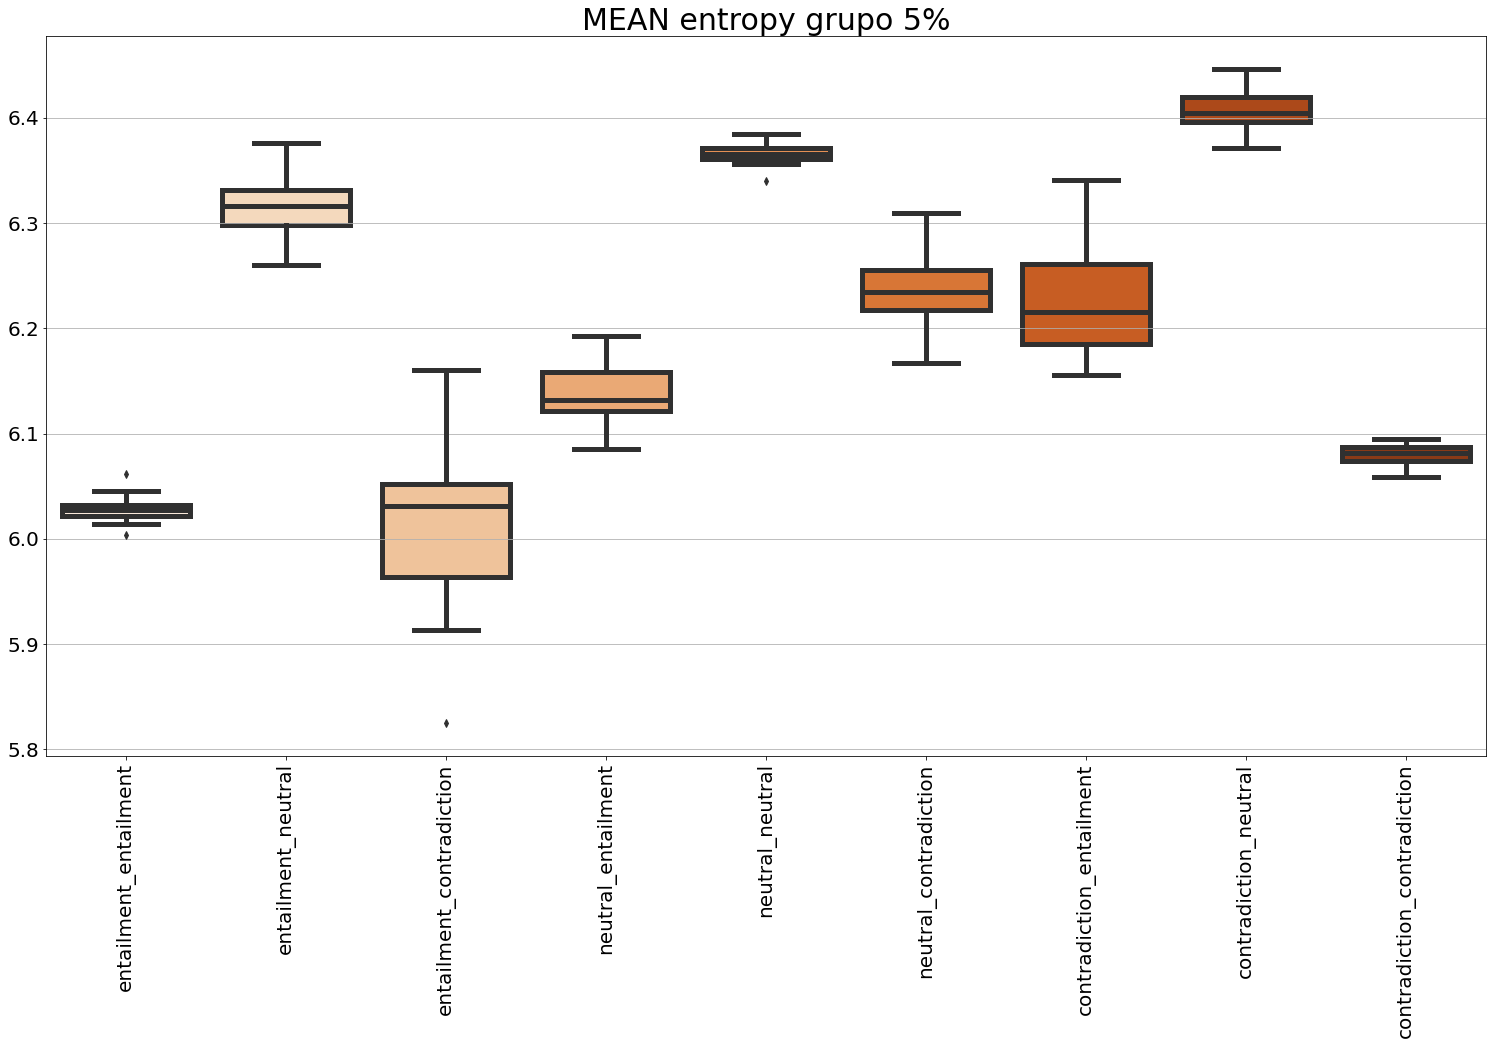

In [39]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[45:54],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[45:54],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

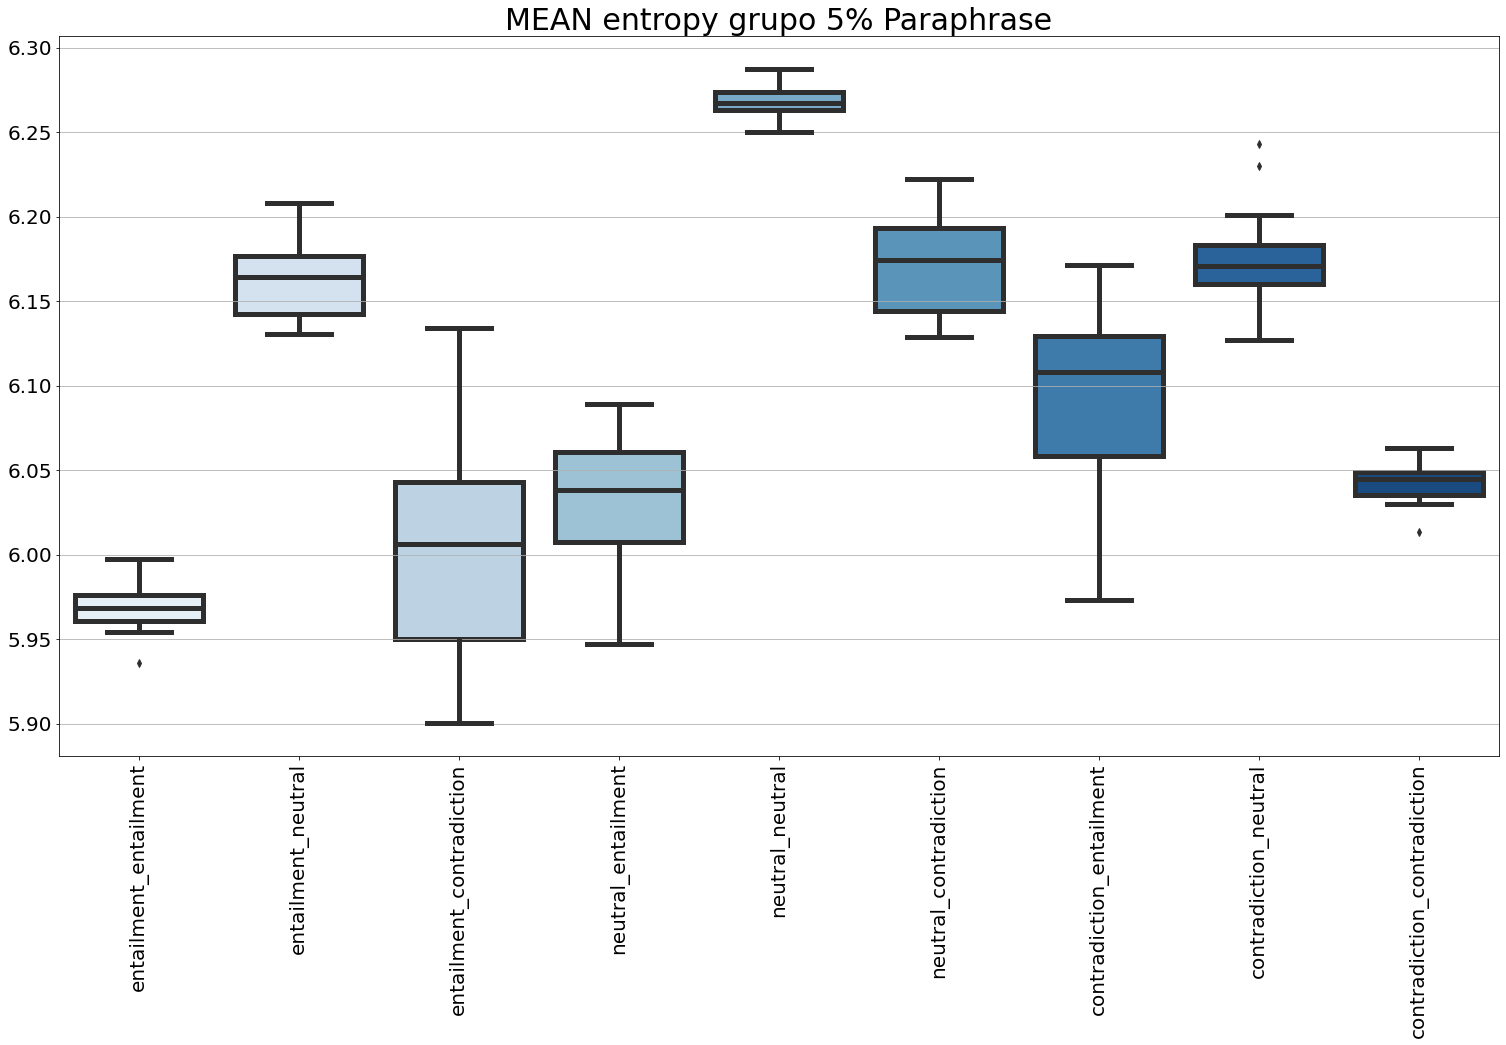

In [40]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[45:54],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[45:54],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

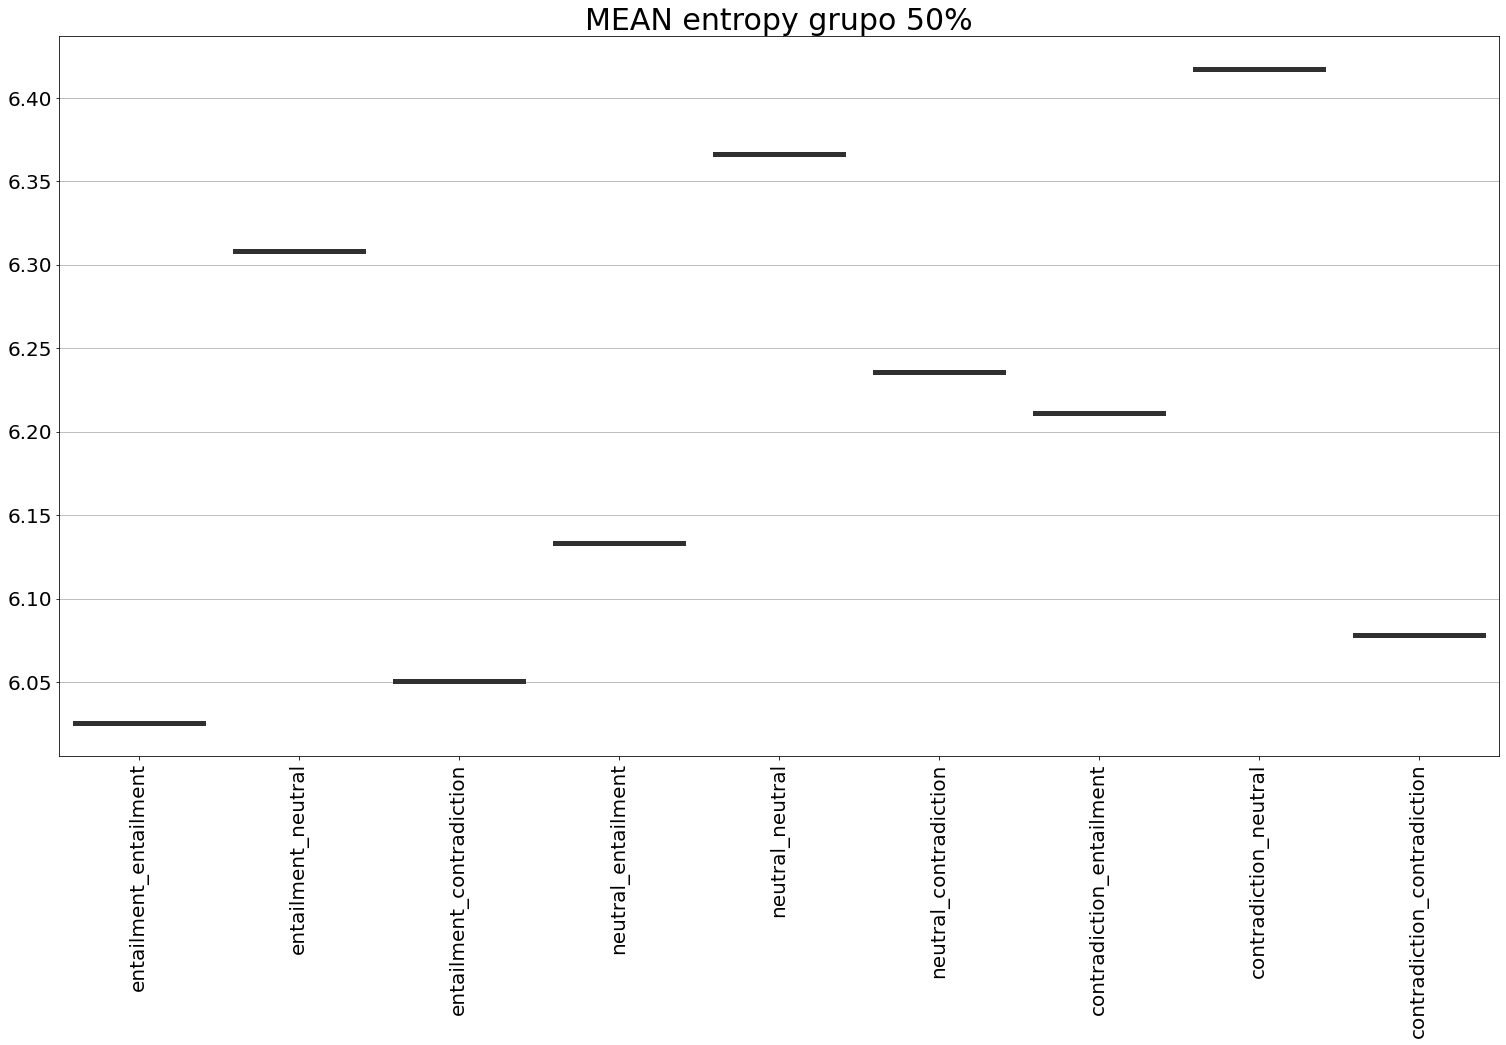

In [41]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[54:63],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[54:63],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

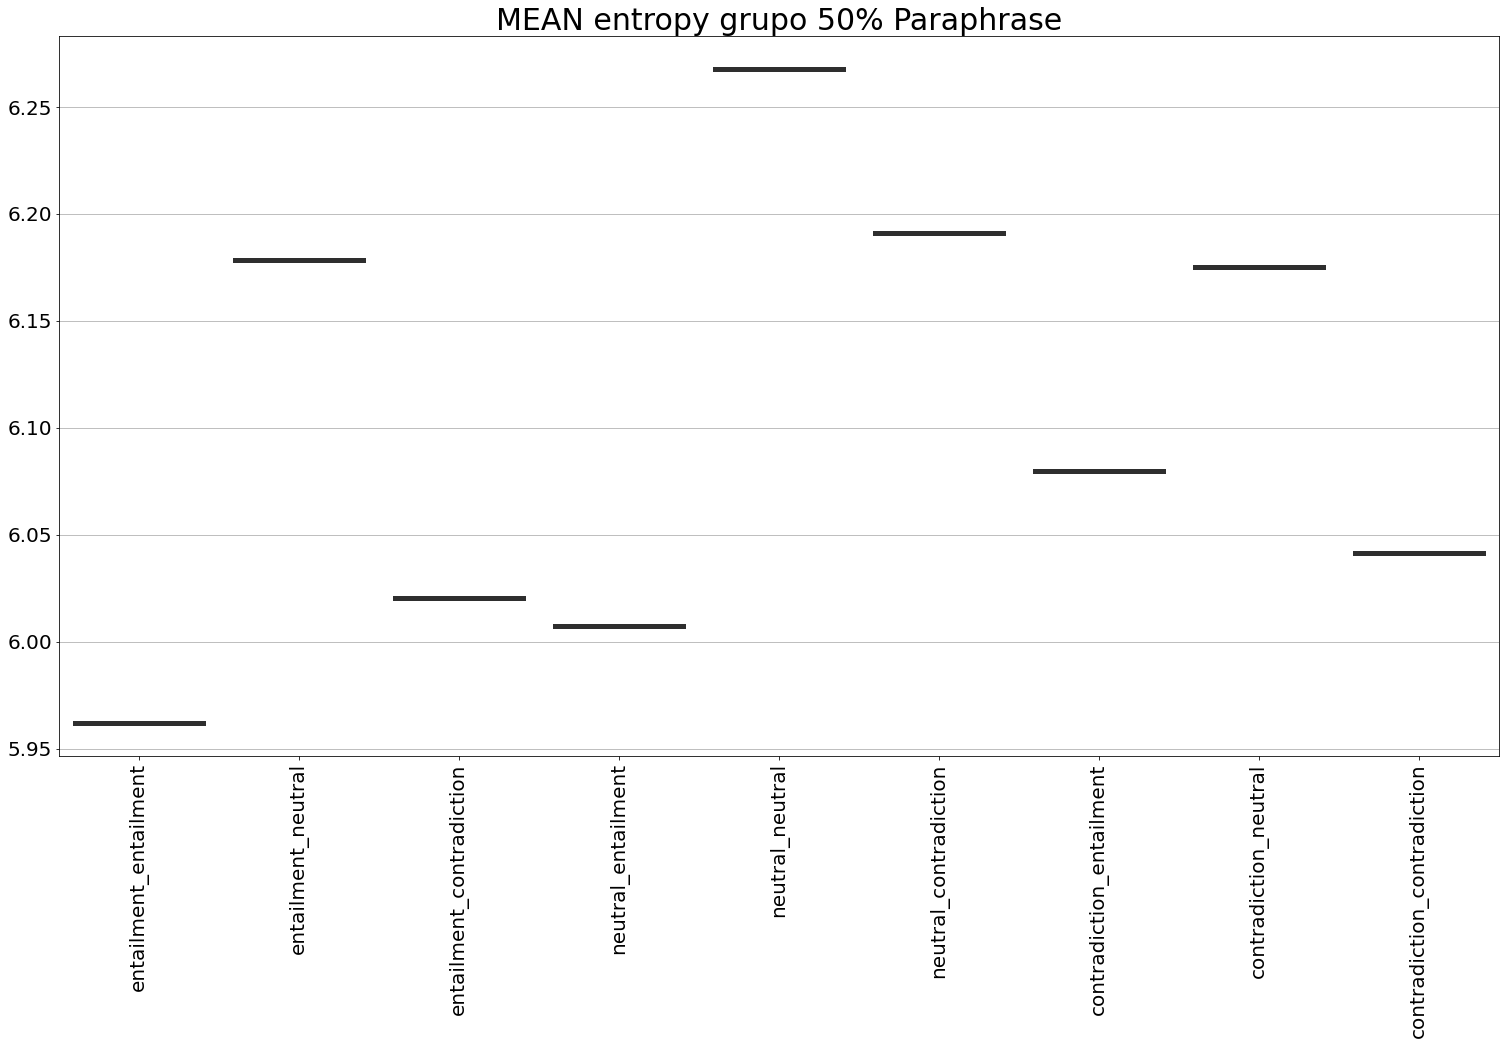

In [42]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[54:63],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[54:63],fontsize=20,rotation=90)